
# ICS - Travaux Pratiques 10

07.05.25


<font color=grey>_Ce 10e TP se concentre sur les algorithmes permettant d'approximer les racines d'une fonction non linéaire en utilisant une approche dichotomique. Nous allons également étudier les différentes approximations possibles de la dérivée d'une fonction pour se préparer au cours de la semaine prochaine._ 

_Note : ne vous sentez pas obligé.e.s de finir la série pendant la séance! Celle-ci est conçue de manière à ce que vous gardiez certains exercices pour vos révisions._ </font>

***

## Exercice 0 : Echauffement

Soit la fonction réelle d'une variable réelle $g:\mathcal{R}\rightarrow\mathcal{R}$ définie par 

$$
g(x) = x^3 sin(\pi x)\,.
$$

On cherche à étudier la fonction $g$ en la représentant graphiquement et en déterminant en particulier le nombre de ses zéros dans un intervalle donné. Pour ce faire, il vous est demandé

1. d'implémenter une fonction Python `representation_graphique` admettant pour arguments :
  * une fonction `f` ;
  * deux nombres `a` et `b`, avec $b>a$, qui précisent, en abscisse, l'intervalle sur lequel la fonction doit être représentée ; 
  * le nombre `N` de points $(x,f(x))$ à considérer dans la représentation ;
  * le `titre` de la représentation ;

  Cette fonction doit produire une sauvegarde `FigureTP10ICS.pdf` de la figure au format pdf et doit afficher la figure dans le Jupyter Notebook ;

2. de définir en Python la fonction $g(x)$ définie ci-dessus ;
3. d'appeler la fonction `representation_graphique` de manière à représenter la fonction $g(x)$ dans l'intervalle $[-2.2,2.2]$ en utilisant $100$ points et en lui donnant pour titre "Représentation graphique de $g(x)$" ;
4. de déterminer visuellement le nombre de zéros dans l'intervalle considéré.

#### <font color=grey>Solution </font>

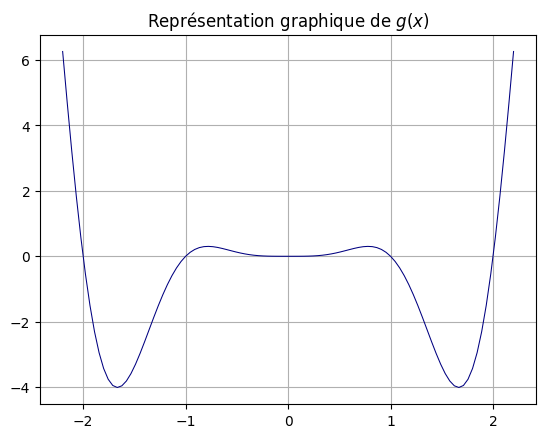

In [135]:
import numpy as np 
import matplotlib.pyplot as plt

def graph(func, lbound, ubound, npoints, title='Function'):
    
    interval = np.linspace(lbound, ubound, npoints)
    images = func(interval)
    plt.plot(interval, images, linewidth=0.75, color='navy')
    plt.grid()
    plt.title(title)
    plt.show()

graph(g:=lambda x: x**3 * np.sin(np.pi*x), -2.2, 2.2, 100, r'Représentation graphique de $g(x)$')

***

## Exercice 1 : Méthode de bissection

Soit la fonction réelle d'une variable réelle $g(x)$ définie ci-dessus à l'`exercice 0`.

Il vous est demandé$\ldots$
1. en utilisant le **théorème de Bolzano**, de montrer que la fonction $g$ admet (au moins) un zéro dans l'intervalle $]-\frac{3}{2},-\frac{1}{2}[$.
2. en implémentant l'algorithme correspondant à la **méthode de la bissection simple**, de trouver un zéro de $g$ appartenant à l'intervalle $]-\frac{3}{2},-\frac{1}{2}[$ avec une **erreur (tolérance) inférieure à $10^{−8}$**.<br>
Construisez pour ce faire une fonction `resoudre_par_bissection_simple` ayant pour arguments :
    - la fonction `f` pour laquelle on veut trouver un zéro ;
    - les extrémités `a` et `b` de l'intervalle considéré ($a<b$) ;
    - la tolérance `tol` désirée.

   Cette fonction doit s'assurer que la condition de Bolzano est bien vérifiée pour l'intervalle demandé (et afficher un message d'erreur si ce n'est pas le cas) et doit retourner :
    - un nombre correspondant...
        * ... soit au point milieu du dernier intervalle considéré par la méthode,
        * ... soit au point milieu $m_k = (a_k + b_k)/2$ d'un intervalle vérifiant $f(m_k)=0$ (solution exacte),

   - ainsi qu'un nombre correspondant au nombre $k\ge 0$ d'itérations effectuées.

3. Au bout de combien d'itérations atteint-on la tolérance demandée? Montrez le résultat (i) théoriquement et (ii) numériquement.

4. Modifier votre fonction pour qu'elle retourne :
    - les solutions approximées $x_k$ à chaque itération de la méthode
    - la borne inférieure de l'intervalle à chaque itération $a_k$
    - la borne supérieure de l'intervalle à chaque itération $b_k$

5. La solution exacte de cette équation dans l'intervalle considéré vaut $\alpha=-1$. Représentez graphiquement l'évolution de l'erreur maximale entre la solution exacte et les bornes supérieures et inférieures des intervalles considérés max($\alpha-a_k, \alpha-b_k$) en fonction du nombre d'itérations. Représentez sur le même graphe l'erreur absolue pour chaque itération.


#### <font color=grey>Solution </font>

In [11]:
print(g(-3/2))
print(g(-1/2))

-3.375
0.125


Il y a un changement de signe, comme la fonction g est continue, $\exists$ au moins un $c\in ]-\frac{3}{2};\; -\frac{1}{2}[$ t.q. $g(c)=0$

In [141]:
def bissection(func, lbound, ubound, tol_target=-1, max_iter=-1):
    '''
    Uses the bissection method to find a root of a function in a given interval

    Args:
        func (function): function to calculate the zeros of
        lbound (float): lower bound of the interval
        ubound (float): lower bound of the interval
        tol_target (int, default: -1): in powers of ten, the wanted precision (ex. 1e-10), disable with -1 (disabled by default)
        max_iter (int, default: -1): maximum iterations to perform, disable with -1 (disabled by default)

    Returns:
        root (float): the root that was found

    Raises:
        Warning: if there is no sign change on the interval
        Exception: if the bissection method does not converge
    '''
    # check if the interval qualifies
    if func(lbound)*func(ubound) > 0:
        raise Warning("The given interval does not satisfy the sign change condition")
        
    # middle of interval
    middle = lambda l, u: (l + u) / 2
    
    # main loop
    counter = 0
    while True:
        counter += 1
        
        # mid point
        mid = middle(lbound, ubound)
        
        # check if tolerance has been reached, return the root if yes
        if (mid - mid // 1 < tol_target and tol_target != -1) or (counter >= max_iter and max_iter != -1):
            return {"root": float(mid), "iterations": counter}

        # calculate function values
        values = np.array([lbound, mid, ubound])
        images = func(values)
        
        # by chance, maybe one of the three is a root?
        if 0 in images:
            return values[imges.find(0)]
            
        # check if [lbound, mid] qualifies
        if images[0]*images[1] < 0:
            ubound = mid # redefine upper bound to have [lbound, mid]
        
        # check if [mid, ubound] qualifies
        elif images[1]*images[2] < 0:
            lbound = mid # redefine lower bound to have [mid, ubound]

        # take care of the case where none of the two new intervals satisfy the sign change condition
        else:
            raise Exception("Sub-intervals do not converge, might be a floating point error")

In [142]:
print(bissection(g, -1.4, -1/2, tol_target=1e-8))

{'root': -0.9999999970197677, 'iterations': 25}


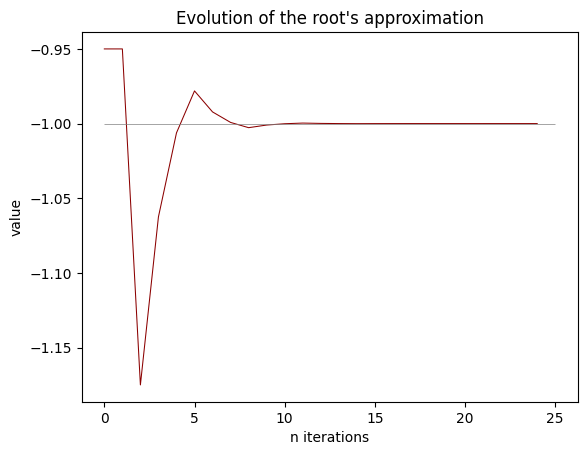

In [143]:
n = 25

approx_lst = []
for i in range(n):
    val = bissection(g, -1.4, -1/2, max_iter=i)['root']
    approx_lst.append(val)

plt.plot(approx_lst, color='darkred', linewidth=0.75)
plt.title('Evolution of the root\'s approximation')
plt.hlines(-1, 0, n, linewidth=0.5, color='gray')
plt.xlabel('n iterations')
plt.ylabel('value')
plt.show()

***

## Exercice 2 : Bissection par intervalles

Dans cet exercice, il vous est demandé d'utiliser la **méthode de la bissection par intervalles** pour déterminer une valeur approchée de **tous les zéros** dans l'intervalle $[-2.2,2.2]$ de la fonction 
$$
g(x) = x^3 sin(\pi x)
$$

déjà étudiée dans l'exercice précédent, l'**erreur commise** devant être inférieure à $10^{-8}$. Plus précisément, il vous est proposé de construire une nouvelle fonction `resoudre_par_bissection` qui fera appel à la fonction `resoudre_par_bissection_simple` définie dans la série précédente pour déterminer les zéros de $g$. Cette fonction devra admettre comme paramètres : 
* `f` : la fonction pour laquelle nous cherchons à trouver $\alpha$ tel que $f(\alpha)=0$ ;
* `a` et `b` : deux nombres qui correspondent aux bornes de l'intervalle initial de recherche ; 
* `step` : la longueur de chacun des intervalles considérés dans la méthode `resoudre_par_bissection_simple`;
* `tol` : nombre réel positif donnant la tolérance à atteindre.

La fonction doit retourner une liste `zeros` renfermant le(s) zéro(s).


Une représentation graphique de la fonction et des zéros trouvés vous permettra de vérifier votre implémentation.

Remarquons que les sous-intervalles peuvent être définis à l'aide d'un tableau (ndarray) de `numpy`, et qu'il faut être particulièrement vigilant dans le choix du nombre de sous-intervalles de manière à éviter la "perte" de certains zéros.

#### <font color=grey>Solution </font>

In [144]:
# won't make a new function to not have to write another docstring but you get the point
# no need to worry of root loss because bissection() checks if bounds are a root every time

# args
n_intervals = 30
main_lbound = -2.2
main_ubound = 2.2

# main logic
roots = []
interval_space = np.linspace(main_lbound, main_ubound, n_intervals)

for i in range(len(interval_space) - 1):
    temp_lbound = interval_space[i]
    temp_ubound = interval_space[i + 1]
    try:
        root = bissection(g, temp_lbound, temp_ubound, max_iter=50)['root']
    except: # catch non convergence
        continue
    else:
        roots.append(float(root))

print(roots)

[-2.0, -1.0, 1.0, 2.0]


***

## Exercice 3 : Méthode des parties proportionnelles (exercice avancé)

<font color=grey>**Préambule** 

Le fonctionnement de la méthode des parties proportionnelles est extrêmement similaire à celui de la méthode par bissection. 

Au lieu de définir le point $x_{k+1}$ comme le milieu de l'intervalle $[a,b]$, celui-ci est défini comme l'intersection entre l'axe des abcisses et la droite reliant les point $(a, f(a))$ et $(b, f(b))$, comme indiqué sur le schéma ci-dessous.</font>

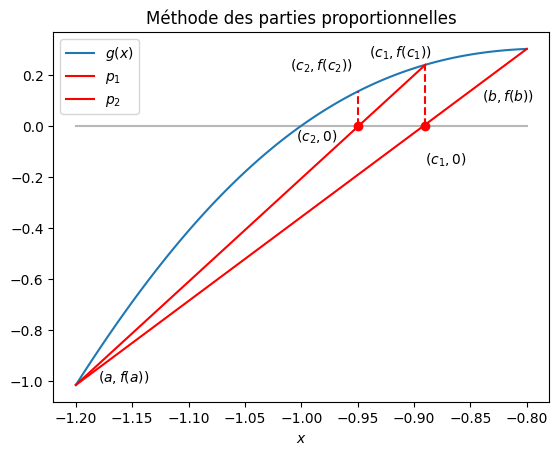

In [145]:
import matplotlib.pyplot as plt
import numpy as np 

def g(x):
    return pow(x,3)*np.sin(np.pi*x)

x = np.linspace(-1.2,-0.8,100)
y = g(x)
plt.plot([x[0],x[-1]], [0,0], c='0.72') # on trace l'axe des x (correspondant à y=0)
#plt.plot([-1.2,-1.2], [y.min(),y.max()], c='0.72') # on utilise les valeurs min et max du tableau y
plt.plot(x,y,label='$g(x)$')
plt.plot([x[0],x[-1]],[y[0],y[-1]],'-r', label='$p_1$')
plt.plot([x[0],-0.89],[y[0],g(-0.89)],'-r', label='$p_2$')
plt.plot([-0.89,-0.89], [0, g(-0.89)],'--r')
plt.plot([-0.95,-0.95], [0, g(-0.95)],'--r')
plt.plot(-0.89,0,'ro')
plt.plot(-0.95,0,'ro')
plt.title("Méthode des parties proportionnelles")
plt.xlabel('$x$')
plt.text(-0.89,-0.15,"$(c_1, 0)$")
plt.text(-0.94,0.27,"$(c_1, f(c_1))$")
plt.text(-1.005,-0.06,"$(c_2, 0)$")
plt.text(-1.01,0.22,"$(c_2, f(c_2))$")
plt.text(-1.18,-1.0,"$(a, f(a))$")
plt.text(-0.84,0.1,"$(b, f(b))$")
plt.legend(loc='upper left')
plt.savefig('FigureICS.pdf')
plt.show()

Dans cet exercice, il vous est demandé de déterminer une valeur approchée **du zéro** de la fonction $g(x) = x^3 sin(\pi x)$ étudiée lors de l'exercice 1, dans l'intervalle $]-1.2,-0.8[$ en implémentant cette fois l'algorithme correspondant à la **méthode des parties proportionnelles**. 

1. Déterminez analytiquement l'expression du point $c$ défini précédemment comme l'intersection entre la droite reliant les points $(a, f(a))$ et $(b, f(b))$ et l'axe $y=0$.

2. Implémentez une fonction `resoudre_par_pp` correspondant à la méthode de recherche des zéros par parties proportionnelles. Cette fonction devra admettre en arguments :
    * la fonction `f` pour laquelle nous cherchons à trouver une solution approchée ;
    * les nombres `a` et `b` correspondant aux bornes de l'intervalle initial de recherche ;
    * la tolérance `tol` à atteindre (en abscisse, entre deux éléments successifs) ;
    * le nombre maximal `k_max` d'itérations à effectuer .

    Cette fonction devra retourner la valeur approchée du zéro de $f$ ainsi qu'une liste contenant la valeur $x_k$ obtenue à chaque itération.

3. Vérifiez votre implémentation en considérant une tolérance de $10^{−8}$ et en observant le nombre d'itérations nécessaires.

#### <font color=grey>Solution </font>

In [170]:
def prop_parts(func, lbound, ubound, tol_target=-1, max_iter=-1):
    '''
    Uses the proportional parts method to find a root of a function in a given interval

    Args:
        func (function): function to calculate the zeros of
        lbound (float): lower bound of the interval
        ubound (float): lower bound of the interval
        tol_target (int, default: -1): in powers of ten, the wanted precision (ex. 1e-10), disable with -1 (disabled by default)
        max_iter (int, default: -1): maximum iterations to perform, disable with -1 (disabled by default)

    Returns:
        root (float): the root that was found

    Raises:
        Warning: if there is no sign change on the interval
        Exception: if the method does not converge
    '''
    # check if the interval qualifies
    if func(lbound)*func(ubound) > 0:
        raise Warning("The given interval does not satisfy the sign change condition")
        
    # middle of interval (only thing that needs to change from regular bissection algorithm)
    # m = slope = (func(l)-func(u))/(l-u)
    # b = y-intercept = (l*func(u) - u*func(l))/(l-u)
    # y = m*x + b = 0 <=> x = -b/m
    middle = lambda l, u: -((l*func(u) - u*func(l))/(l-u))/((func(l)-func(u))/(l-u))
    
    # main loop
    counter = 0
    while True:
        counter += 1
        
        # mid point
        mid = middle(lbound, ubound)
        # check if tolerance has been reached, return the root if yes
        if (mid - mid // 1 < tol_target and tol_target != -1) or (counter >= max_iter and max_iter != -1):
            return {"root": float(mid), "iterations": counter}

        # calculate function values
        values = np.array([lbound, mid, ubound])
        images = func(values)
        
        # by chance, maybe one of the three is a root?
        if 0 in images:
            return values[imges.find(0)]
            
        # check if [lbound, mid] qualifies
        if images[0]*images[1] < 0:
            ubound = mid # redefine upper bound to have [lbound, mid]
        
        # check if [mid, ubound] qualifies
        elif images[1]*images[2] < 0:
            lbound = mid # redefine lower bound to have [mid, ubound]

        # take care of the case where none of the two new intervals satisfy the sign change condition
        else:
            raise Exception("Sub-intervals do not converge, might be a floating point error")

In [171]:
# graph(g, -1.2, -0.8, 100, r'$g(x)$')

In [172]:
print(prop_parts(g, -1.2, -0.8, tol_target=1e-8))

{'root': -0.9999999955419305, 'iterations': 19}


On voit que `prop_parts()` converge plus vite que `bissection()`

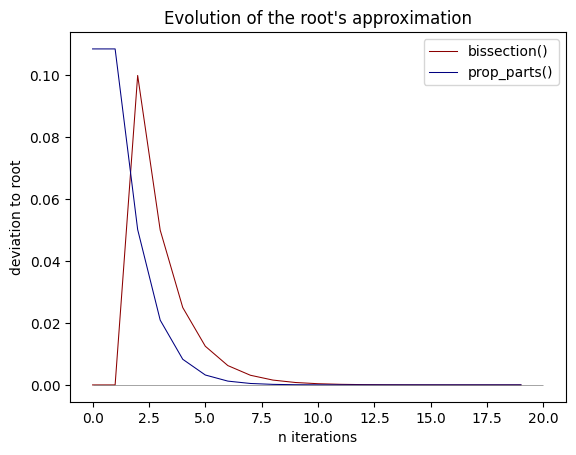

In [182]:
n = 20
root = -1 # assuming we know it beforehand

biss_lst = []
part_lst = []
for i in range(n):
    # bissection
    val = bissection(g, -1.2, -0.8, max_iter=i)['root']
    biss_lst.append(abs(val - root))
    # parts
    val = prop_parts(g, -1.2, -0.8, max_iter=i)['root']
    part_lst.append(abs(val - root))
    

plt.plot(biss_lst, color='darkred', linewidth=0.75, label='bissection()')
plt.plot(part_lst, color='navy', linewidth=0.75, label='prop_parts()')
plt.title('Evolution of the root\'s approximation')
plt.hlines(0, 0, n, linewidth=0.5, color='gray')
plt.xlabel('n iterations')
plt.ylabel('deviation to root')
plt.legend()
plt.show()

***

## Exercice 4 : Dérivée première d'une fonction 


<font color=grey>**Préambule**

Soit $f:[a,b]\rightarrow \mathcal{R}$ une fonction continûment dérivable dans $[a,b]$, on peut envisager essentiellement trois méthodes (ou schémas) pour approximer la dérivée de $f$ (c'est-à-dire le taux de variation de $f$) en un point $p$ de $]a,b[$. En effet, la définition de la dérivée d'une fonction $f$ suggère qu'une bonne approximation numérique est certainement donnée par
$$
f_{prime,d}(p)=\dfrac{f(p+h)-f(p)}{h}\,,
$$
pour autant que $h$ soit un nombre positif et suffisamment petit.
On appelle cette quantité la **différence finie à droite**. On pourrait également envisager considérer...:
* la **différence finie à gauche**
$$
f_{prime,g}(p)=\dfrac{f(p)-f(p-h)}{h}\,;
$$
* ou la **différence finie centrée** (moyenne des deux autres différences)
$$
f_{prime,c}(p)=\dfrac{f(p+h)-f(p-h)}{2h}\,.
$$</font>

Dans cet exercice, il vous est demandé d'écrire une fonction `derivee` qui admet pour arguments une fonction `f`, un nombre `p`, un schéma `schema` et un nombre `h`. Les deux derniers arguments devront être facultatifs, leur valeur par défaut étant, respectivement, `centree` et `0.1`. La fonction `derivee` devra retourner un nombre correspondant à l'approximation de la dérivée $f'$ de $f$ évaluée en $p$, obtenue à l'aide de la méthode choisie qui pourra être `droite`, `gauche` ou `centree`. La méthode devra retourner un message d'erreur si la méthode passée en arguments n'est pas une des trois méthodes implémentées.

Vérifiez votre travail en représentant la fonction $f(x)=\cos{x}$ au voisinage de $x=0$ et en calculant le nombre dérivé de $f$ en $x=0$ à l'aide des trois schémas proposés. Que pouvez-vous dire de la précision de ces trois schémas ?  
Représentez également sur une même figure la fonction $f(x)=\cos{x}$, la fonction dérivée $f'(x)$ (calculée analytiquement), ainsi que la fonction $f_{prime,c}(x)$. Considérez pour ce faire l'intervalle $[-1,1]$ en abscisse.

#### <font color=grey>Solution </font>

In [189]:
def derivative(func, p, schema='c', h=0.1):
    # centered
    if schema[0] == 'c':
        return (func(p + h) - func(p - h))/(2 * h)

    # left
    elif schema[0] == 'l':
        return (func(p) - func(p - h))/(2 * h)

    # right
    elif schema[0] == 'r':
        return (func(p + h) - func(p))/(2 * h)
    
    # input problem
    else:
        raise Warning("Schema must be one of 'left', 'right' or 'centered'")

In [199]:
print(derivative(lambda x: np.cos(x), 0))

0.0


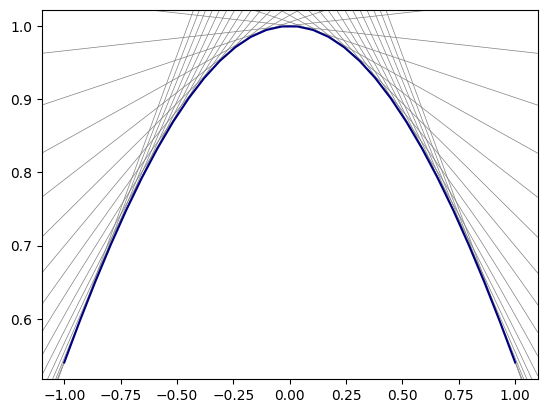

In [205]:
f = lambda x: np.cos(x)

for i in (inter := np.linspace(-1, 1, 30)):
    plt.axline((i, f(i)), slope=derivative(f, i), linewidth=0.5, color='gray')

plt.plot(inter, f(inter), color='navy')
plt.show()